# The Elevator Image

During my Masters degree in Data Science I lived in an international student accomodation. We had four buildings forming a square, each named after an inspiring individual. Their names were Vincent van Gogh, Aletta Jacobs, Isaac Newton and Albert Einstein. The entrances and elevator waiting areas had been designed in a typical artful corporate style. What particularly caught my attention were the placards displaying the numbers of each floor. A unicolored pixelated image of the individual after whom the building was named after formed the background to the large number in black. I lived on the 13th floor of the Einstein building and to so every morning I saw him deep in thought as I waited for the elevator. 

In the first block of my program I took a course covering image analysis techniques. We were introduced to PIL, Matplotlib and other useful libraries for image manipulation. Sometime after properly realizing that images are just arrays of numbers and staring at Einstein enough in the mornings, I made a connection. I saw that the design used circles to represent pixels and their diameter to represent their intensity. Knowing from our data mining course that the size parameter for scatter plots could be set individually per data point I was very intruiged how difficult it would be to recreate the design hanging on the wall next to the elevators. 

<img src="Original_Albert_Einstein.jpg" style="width: 300px;">

I began by searching for a probable candidate for the background image. Luckily it is a rather famous image of Einstein and I soon found a satisfactory replica.

<img src="AlbertEinstein.jpg" style="width: 300px;">

The idea I had in mind was to use the intensity values of the image in the size parameter of a scatter plot. I began my loading in the image and manipulating it in the way we had learned in our image analysis course. I cropped it to match the design I had seen. I created a two `for` loops to create a meshgrid of axeses indicies for the image values. I later found out that numpy has the built in function `np.meshgrid()` for this very purpose. I plugged in the varaibles and it worked! The points were very small and the image flipped along the x axis but the idea had worked. After some experimentation I realized that it would also help to rescale the image to a smaller size in order for the intended circle design to really come into effect. A remaining problem was that the circles were all too similar in diameter, which made the patterns harder to see. To solve this I used histogram equalization to increase the contrast of the image. The final step was to add the text found on the original design. As the font was probably bought I made due with the default provided font with matplotlib. 

All in all it was quite the success. The images look fairly similar and I now have a method to convert images into this particular deisgn style.

In [1]:
from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.exposure import histogram, equalize_hist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

(100, 100)


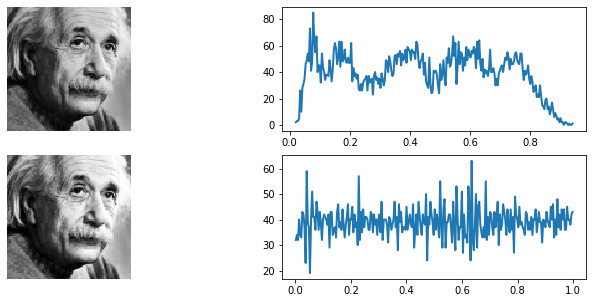

In [23]:
## Read in source image and rescale values from 0-255 to 0-1
im = io.imread("AlbertEinstein.jpg")
im = im.astype(float)
im = (im-im.min())/im.max()

## Convert image to grey scale to reduce the 3 RGB dimension down to 1.
im = color.rgb2gray(im)

## Crop the image to fit the design found
x = 115; y = 70
im = im[x:x+265,y:y+265]

## Rescale the image to a 100x100 grid
im_r = rescale(im, 100/im.shape[0])
print(im_r.shape)

## Perform histogram equalization to increase the contrast of the image
hist, hist_centers=histogram(im_r)
im_eq = equalize_hist(im_r)
hist_eq, hist_centers_eq = histogram(im_eq)

## Plot the image before and after the equalization
plt.figure(figsize=(12,5))
plt.subplot(221).imshow(im_r, cmap = 'gray')
plt.axis("off")
plt.subplot(222).plot(hist_centers, hist, lw=2)
plt.subplot(223).imshow(im_eq, cmap = 'gray')
plt.axis("off")
plt.subplot(224).plot(hist_centers_eq, hist_eq, lw=2)
plt.show()

In [3]:
## The grey scale values are inverted to act as the size parameter for the scatter plot
pixel_sizes = 1- im_eq

## Creating a mesh grid to 
x, y = np.meshgrid(np.arange(100), np.arange(100))

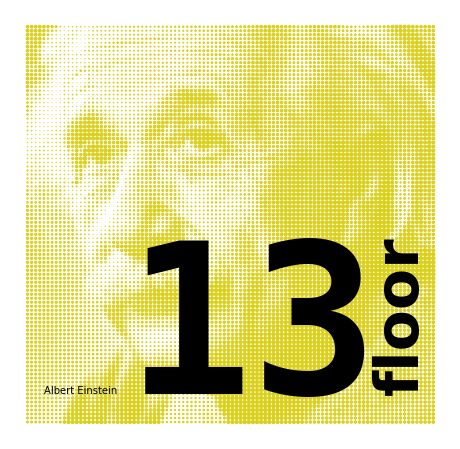

In [18]:
plt.figure(figsize = (8,8))
plt.scatter(x.ravel(), y.ravel(), s = pixel_sizes*12, c = '#dad01b')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.axis('off')
floor = 92
plt.text(95,floor,"Albert Einstein", fontsize=10)
plt.text(75,floor,"13", fontsize=210, weight="bold", family="monospace")
plt.text(15,floor-3,"floor", fontsize=60, rotation=90, weight="bold")
plt.savefig('Transformed_Albert_Einstein.jpg', bbox_inches="tight")

Here is the final result displayed besides the original for comparison.

(-0.5, 2755.5, 2755.5, -0.5)

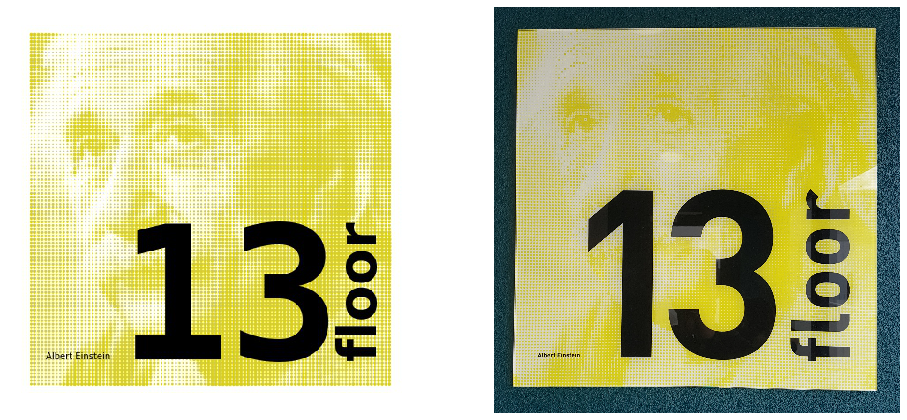

In [22]:
im = io.imread("Transformed_Albert_Einstein.jpg")
im2 = io.imread("Original_Albert_Einstein.jpg")
plt.figure(figsize=(16,8))
plt.subplot(1,2,1).imshow(im)
plt.axis("off")
plt.subplot(1,2,2).imshow(im2)
plt.axis("off")

Below a generalized function to perform the pixel to circle transformation for any image. The function does not rescale or flip the x axis as was the case for the example image above.

In [58]:
def pixels_to_circles(file_name:str, width:int=100, scale_sizes=10, im_color:str="black", save_file:str=None):
    """This function transforms an input image into a circle pixel style image.
    Inputs
        file_name:   file name
        width:       width in terms of pixels 
        scale_sizes: scales the size parameter of the matplotlib.pyplot.scatter function
        im_color:    sets the color to use for the circle pixels. Defaults to black.
        save_file:   if not None will save the figure with this file name. Defaults to None.
    
    Displays the figure
    
    Returns 
        None """
    
    im = io.imread(file_name)
    im = im.astype(float)
    im = (im-im.min())/im.max()
    im = color.rgb2gray(im)
    im = rescale(im, width/im.shape[0])
    im = equalize_hist(im)
    
    x_size, y_size = im.shape   
    pixel_sizes = 1 - im

    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    
    plt.figure(figsize=(8,8))
    plt.scatter(x.ravel(), y.ravel(), s=pixel_sizes*scale_sizes, c=im_color)
    plt.gca().invert_yaxis()
    plt.axis('off')
    if save_file != None: 
        plt.savefig(save_file, bbox_inches="tight")
    
    return None

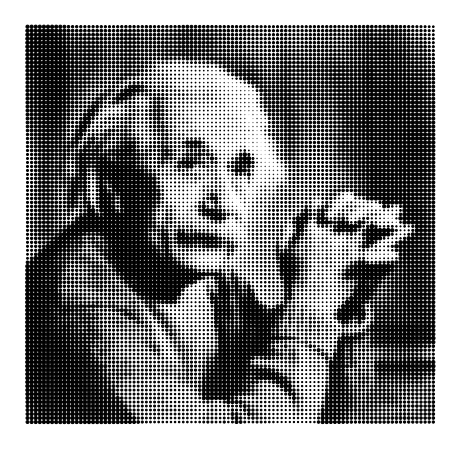

In [63]:
pixels_to_circles("AlbertEinstein.jpg", width=100, scale_sizes=15)